# SKU110K Shelf Detection with YOLOv8n

This notebook demonstrates **object detection and item counting** on retail shelf images using a custom-trained YOLOv8n model on the **SKU110K** dataset.

While **object tracking** is often used in video analysis, this project focuses solely on **static image detection** — a critical step for real-world applications such as inventory monitoring, retail automation, and planogram compliance.

###  Objectives

- Detect objects (products) in shelf images
- Count the number of items per image
- Visualize detections with bounding boxes
- Run batch inference on test samples for performance inspection




## What is the SKU110K Dataset?

**SKU110K** is a large-scale, real-world dataset of **11,762 high-resolution images** of retail store shelves, collected from grocery and convenience stores across the globe.

Each image contains **tens to hundreds of densely packed products**, annotated with **bounding boxes** around each visible item. The dataset is specifically designed to challenge object detection algorithms in **cluttered, high-density environments**.

- Images: ~11,700 shelf photos
- Classes: Single class (product/item)
- Annotations: ~1.7 million bounding boxes
- Format: Pascal VOC (XML)




## Why It Matters

Counting and detecting products on store shelves is a critical challenge in **retail automation** and **inventory intelligence**.

-  Manual stock checking is slow and error-prone  
-  Camera-based monitoring enables real-time shelf analytics  
-  Automated alerts help restock and reduce out-of-stock losses  

This notebook demonstrates how **YOLOv8** can address this challenge by efficiently detecting and counting items in **dense, cluttered shelf environments**, making it highly relevant for **smart retail systems**, **inventory tracking**, and **supply chain optimization**.

## 🛠️ How the Model Was Trained

This project uses a custom-trained [YOLOv8n](https://github.com/ultralytics/ultralytics) (nano) model fine-tuned on the **SKU110K** dataset.

###  Training Details

- **Base Model**: `yolov8n.pt` (YOLOv8 Nano)
- **Framework**: [Ultralytics YOLOv8](https://docs.ultralytics.com/)
- **Images Used**: Full SKU110K dataset (train/val/test split)
- **Classes**: Single class (object)
- **Epochs**: 20
- **Batch Size**: 2
- **Image Size**: 640 x 640
- **Augmentations**: Default YOLOv8 augmentations enabled
- **Exported Weights**: `outputs/sku110k_continue/weights/best.pt`
- **Note**: The model was trained on a local machine (ASUS TUF FX505DD) with limited resources. As a result, the batch size was set to 2 to fit in available GPU memory (NVIDIA GTX 1050 3GB).


### Validation Metrics

The precision-recall curves, loss curves, and confusion matrix are in the **Training Performance** section.


## Setup

In [38]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

In [39]:
model = YOLO("../outputs/sku110k_continue/weights/best.pt")

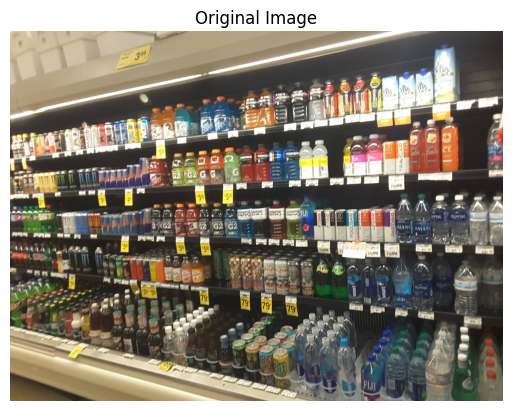

In [40]:
# Load the image
img_path = r"../datasets/SKU-110K/images/test_4.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()



image 1/1 d:\Projects\sku110k-yolov8-shelf-detector\notebooks\..\datasets\SKU-110K\images\test_4.jpg: 480x640 181 objects, 65.5ms
Speed: 23.4ms preprocess, 65.5ms inference, 75.4ms postprocess per image at shape (1, 3, 480, 640)


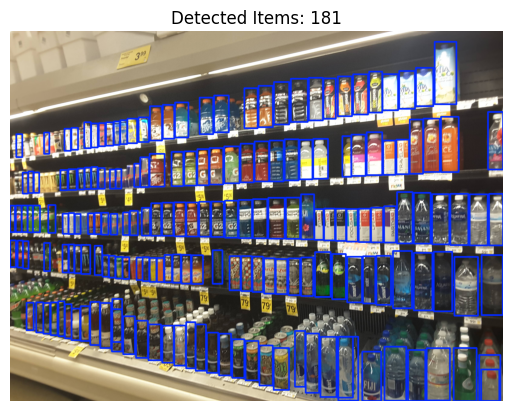

In [41]:
## Inference and Counting
results = model(img_path, conf=0.4)
result = results[0]

# Plot results with boxes
annotated_img = result.plot(labels=False)

plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Items: {len(result.boxes)}")
plt.axis("off")
plt.show()


image 1/1 d:\Projects\sku110k-yolov8-shelf-detector\notebooks\..\datasets\SKU-110K\test_images\test_0.jpg: 640x480 143 objects, 38.9ms
Speed: 4.2ms preprocess, 38.9ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 d:\Projects\sku110k-yolov8-shelf-detector\notebooks\..\datasets\SKU-110K\test_images\test_1.jpg: 640x480 158 objects, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 d:\Projects\sku110k-yolov8-shelf-detector\notebooks\..\datasets\SKU-110K\test_images\test_10.jpg: 640x384 147 objects, 52.5ms
Speed: 2.6ms preprocess, 52.5ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 d:\Projects\sku110k-yolov8-shelf-detector\notebooks\..\datasets\SKU-110K\test_images\test_11.jpg: 640x480 135 objects, 24.3ms
Speed: 4.3ms preprocess, 24.3ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 d:\Projects\sku110k-yolov8-shelf-detector\notebooks\..\

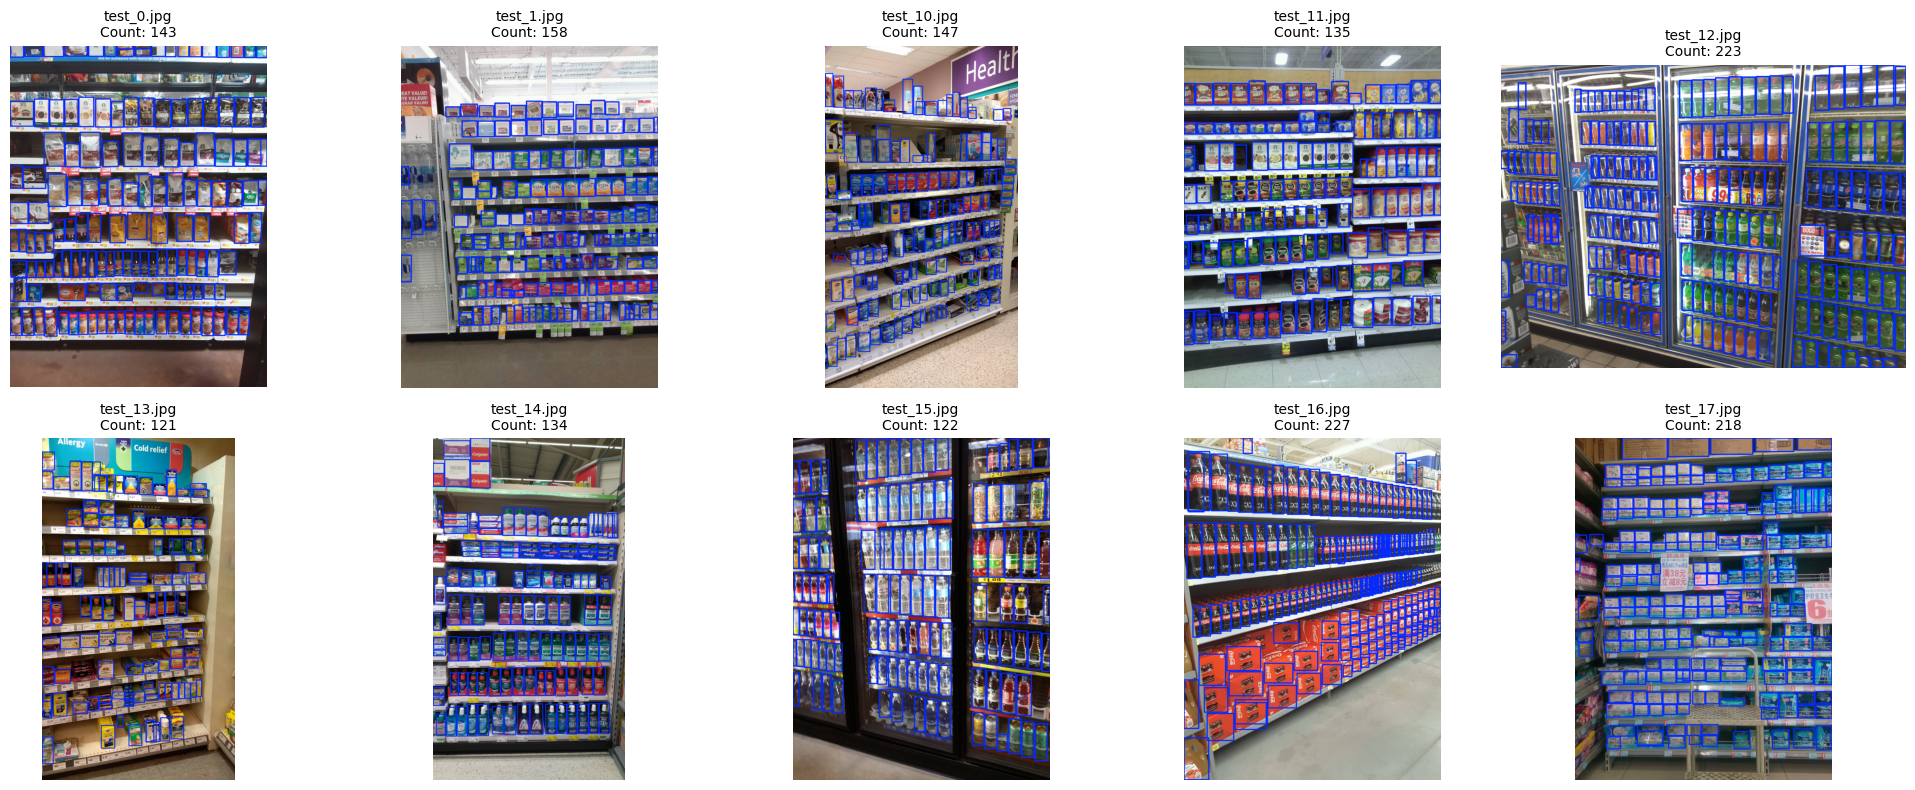

In [42]:
import glob
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the model
model = YOLO("../outputs/sku110k_continue/weights/best.pt")

# Get test images (corrected path)
test_images = glob.glob("../datasets/SKU-110K/test_images/*.jpg")
test_images = test_images[:10]  # Limit to 10

# Prepare results
annotated_images = []
titles = []

for path in test_images:
    result = model(path)[0]
    count = len(result.boxes)
    annotated_img = result.plot(labels=False)  # Draw boxes without labels
    annotated_images.append(annotated_img[..., ::-1])  # Convert BGR to RGB
    titles.append(f"{os.path.basename(path)}\nCount: {count}")

# Plot in subplots
num_images = len(annotated_images)
cols = 5
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(20, 8))

for i, (img, title) in enumerate(zip(annotated_images, titles)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(title, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


### Training Performance



- **Loss curves** show stable convergence over epochs, indicating proper learning without overfitting.
- **Precision-Recall curve** demonstrates that the model maintains good precision even with dense shelf layouts.
- The **confusion matrix** confirms that the single-class detection was well-separated, with minimal false positives.

These metrics collectively confirm that the retrained YOLOv8n model performs well on the SKU110K dataset, especially considering the small model size (`yolov8n.pt`) and the complexity of crowded shelf images.


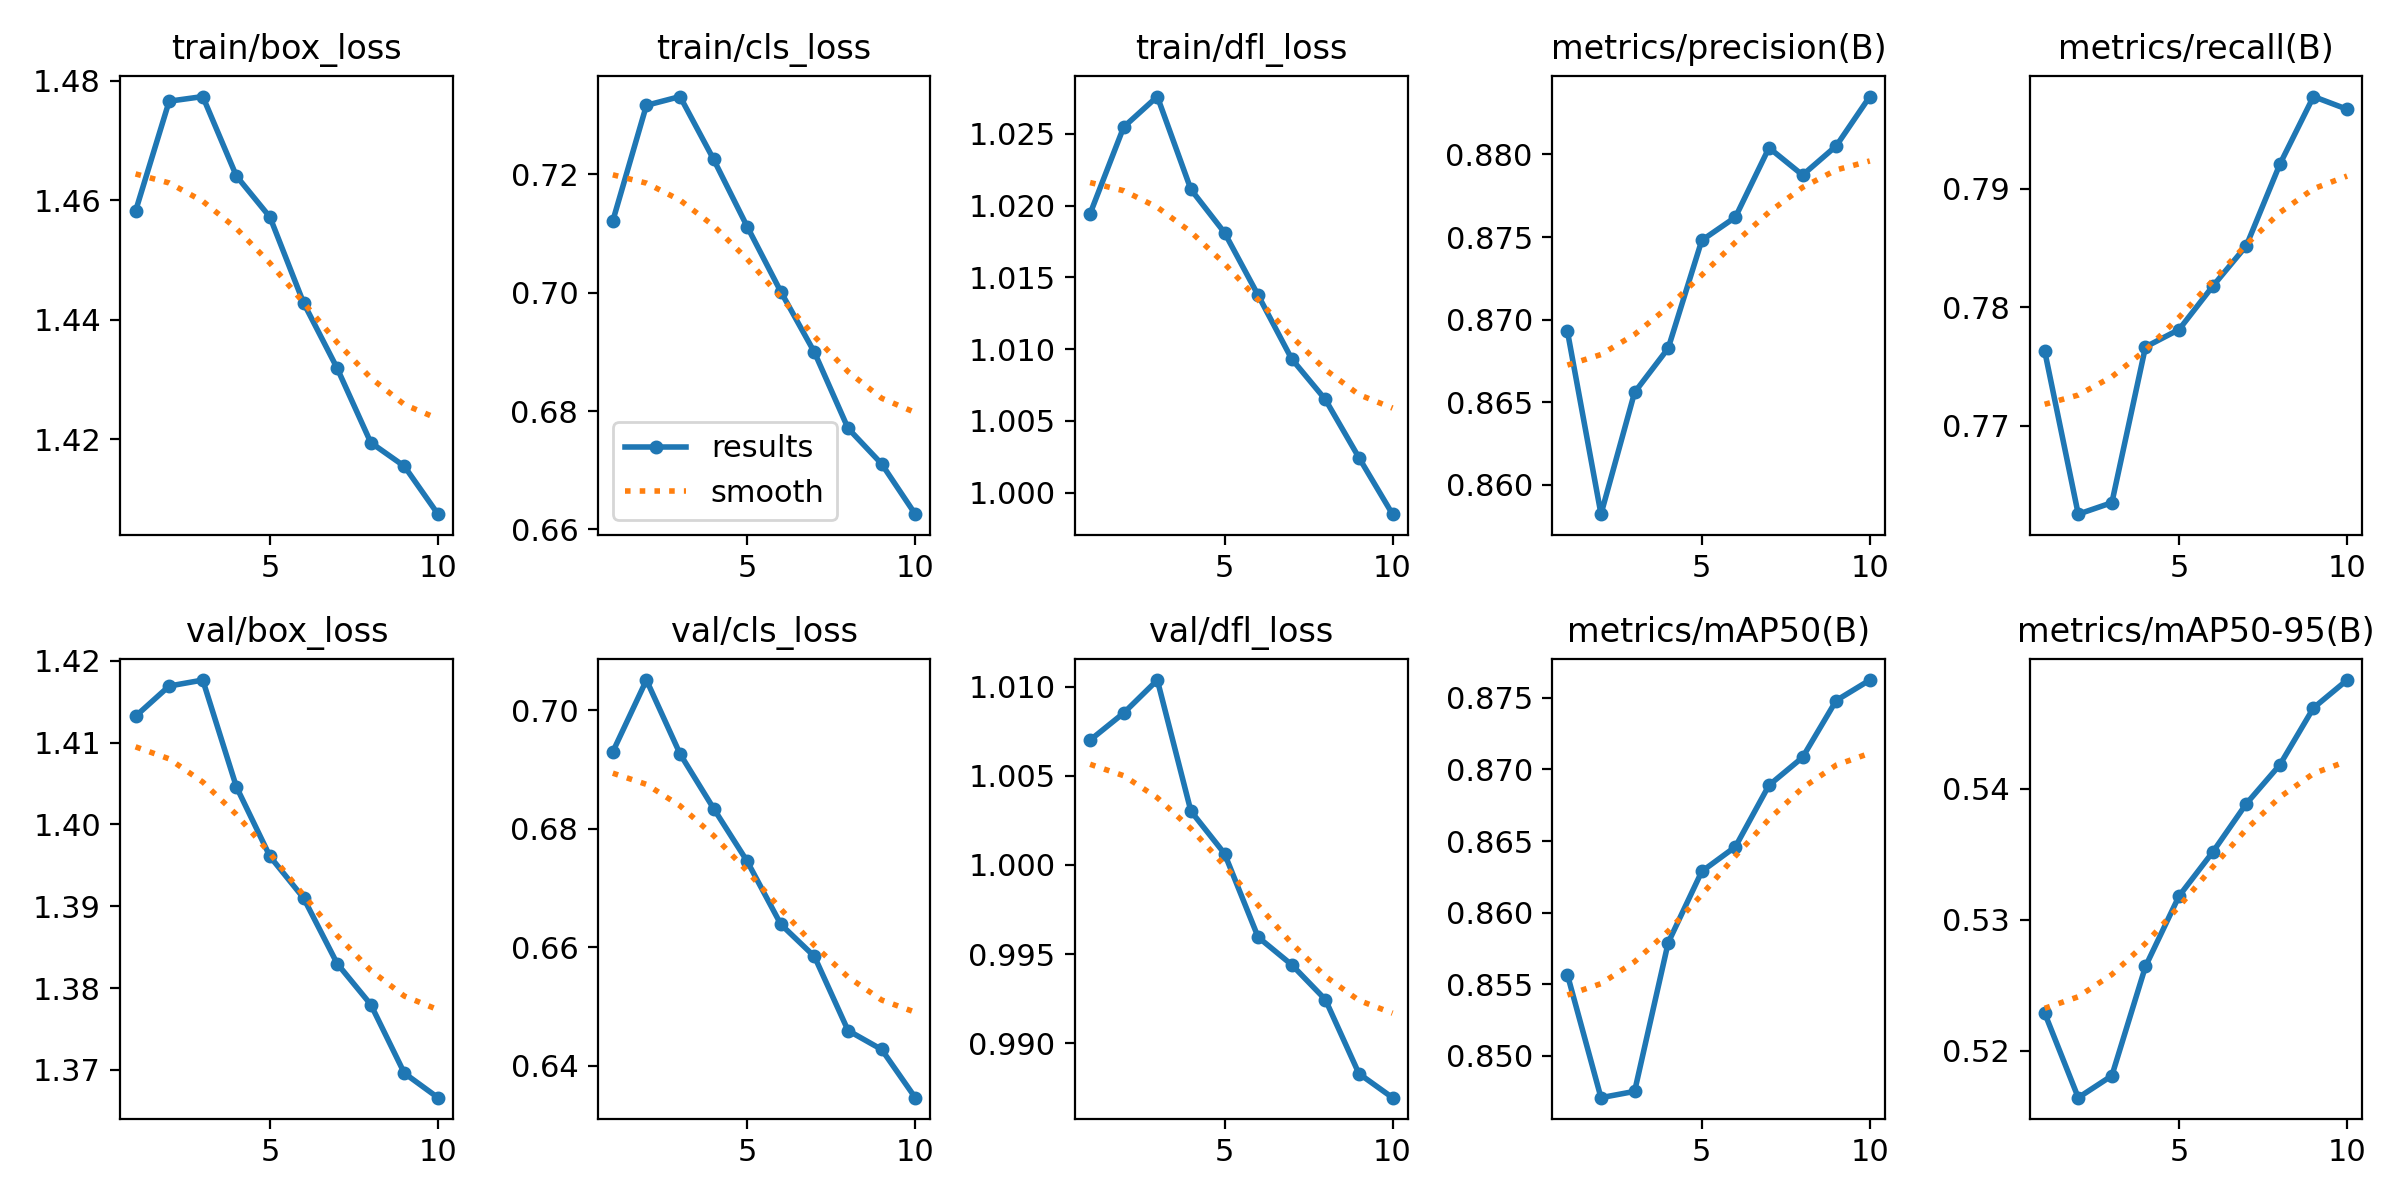

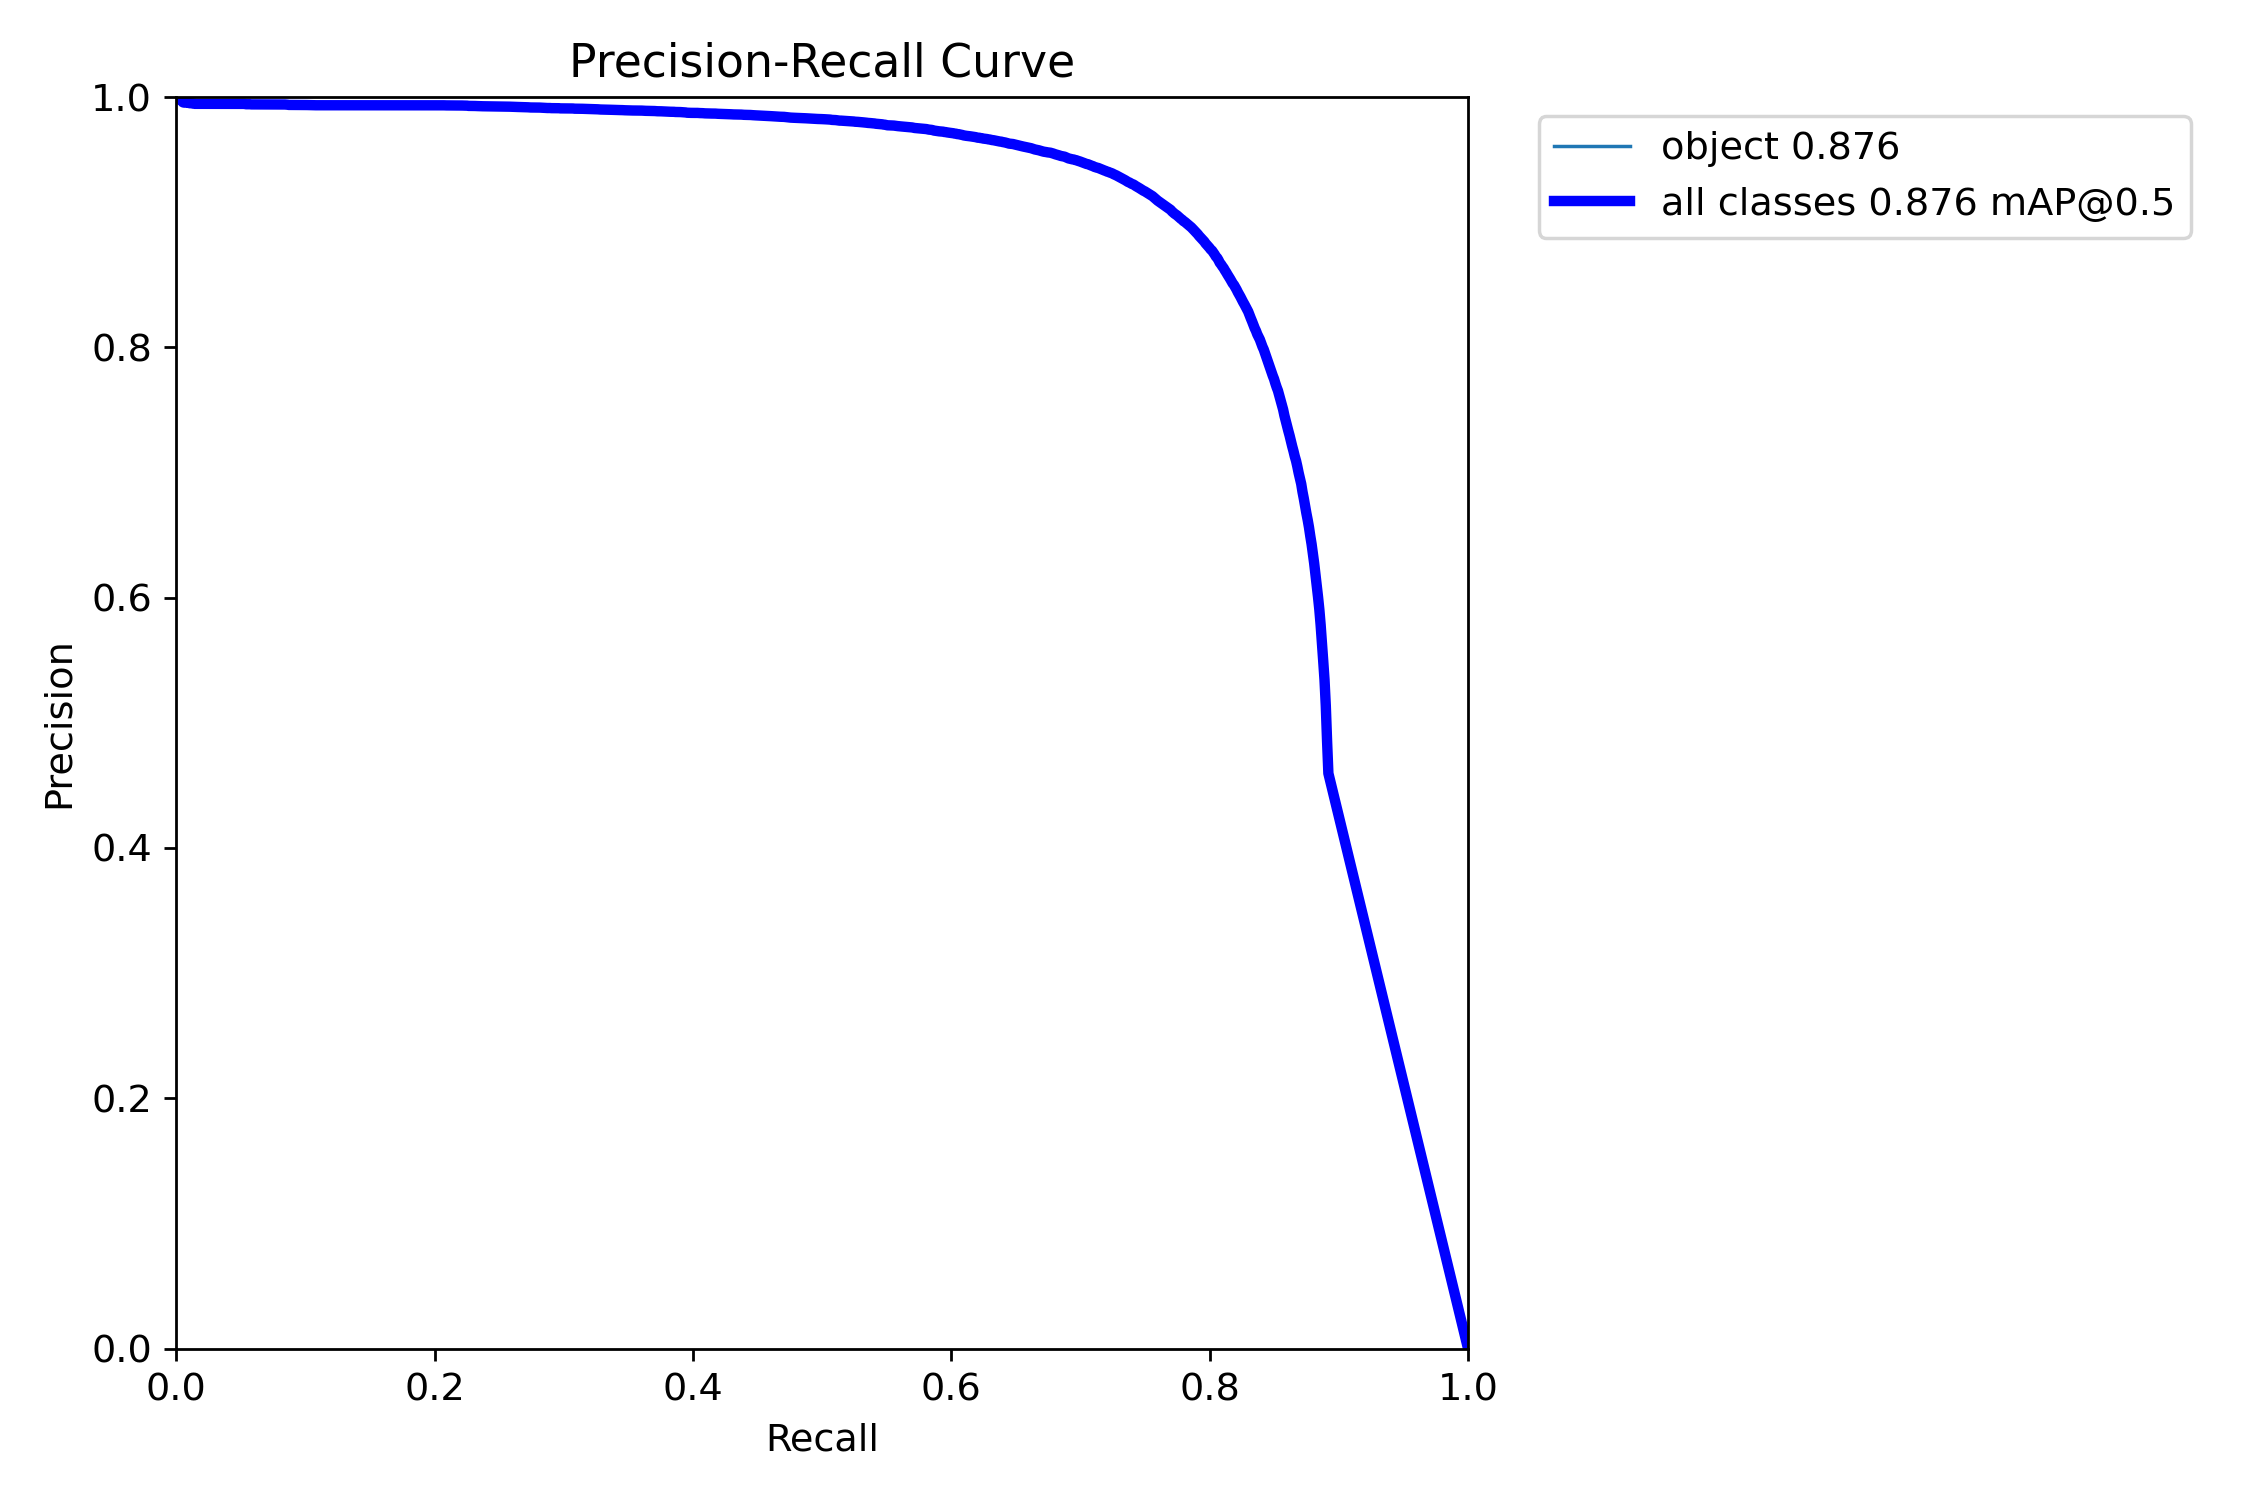

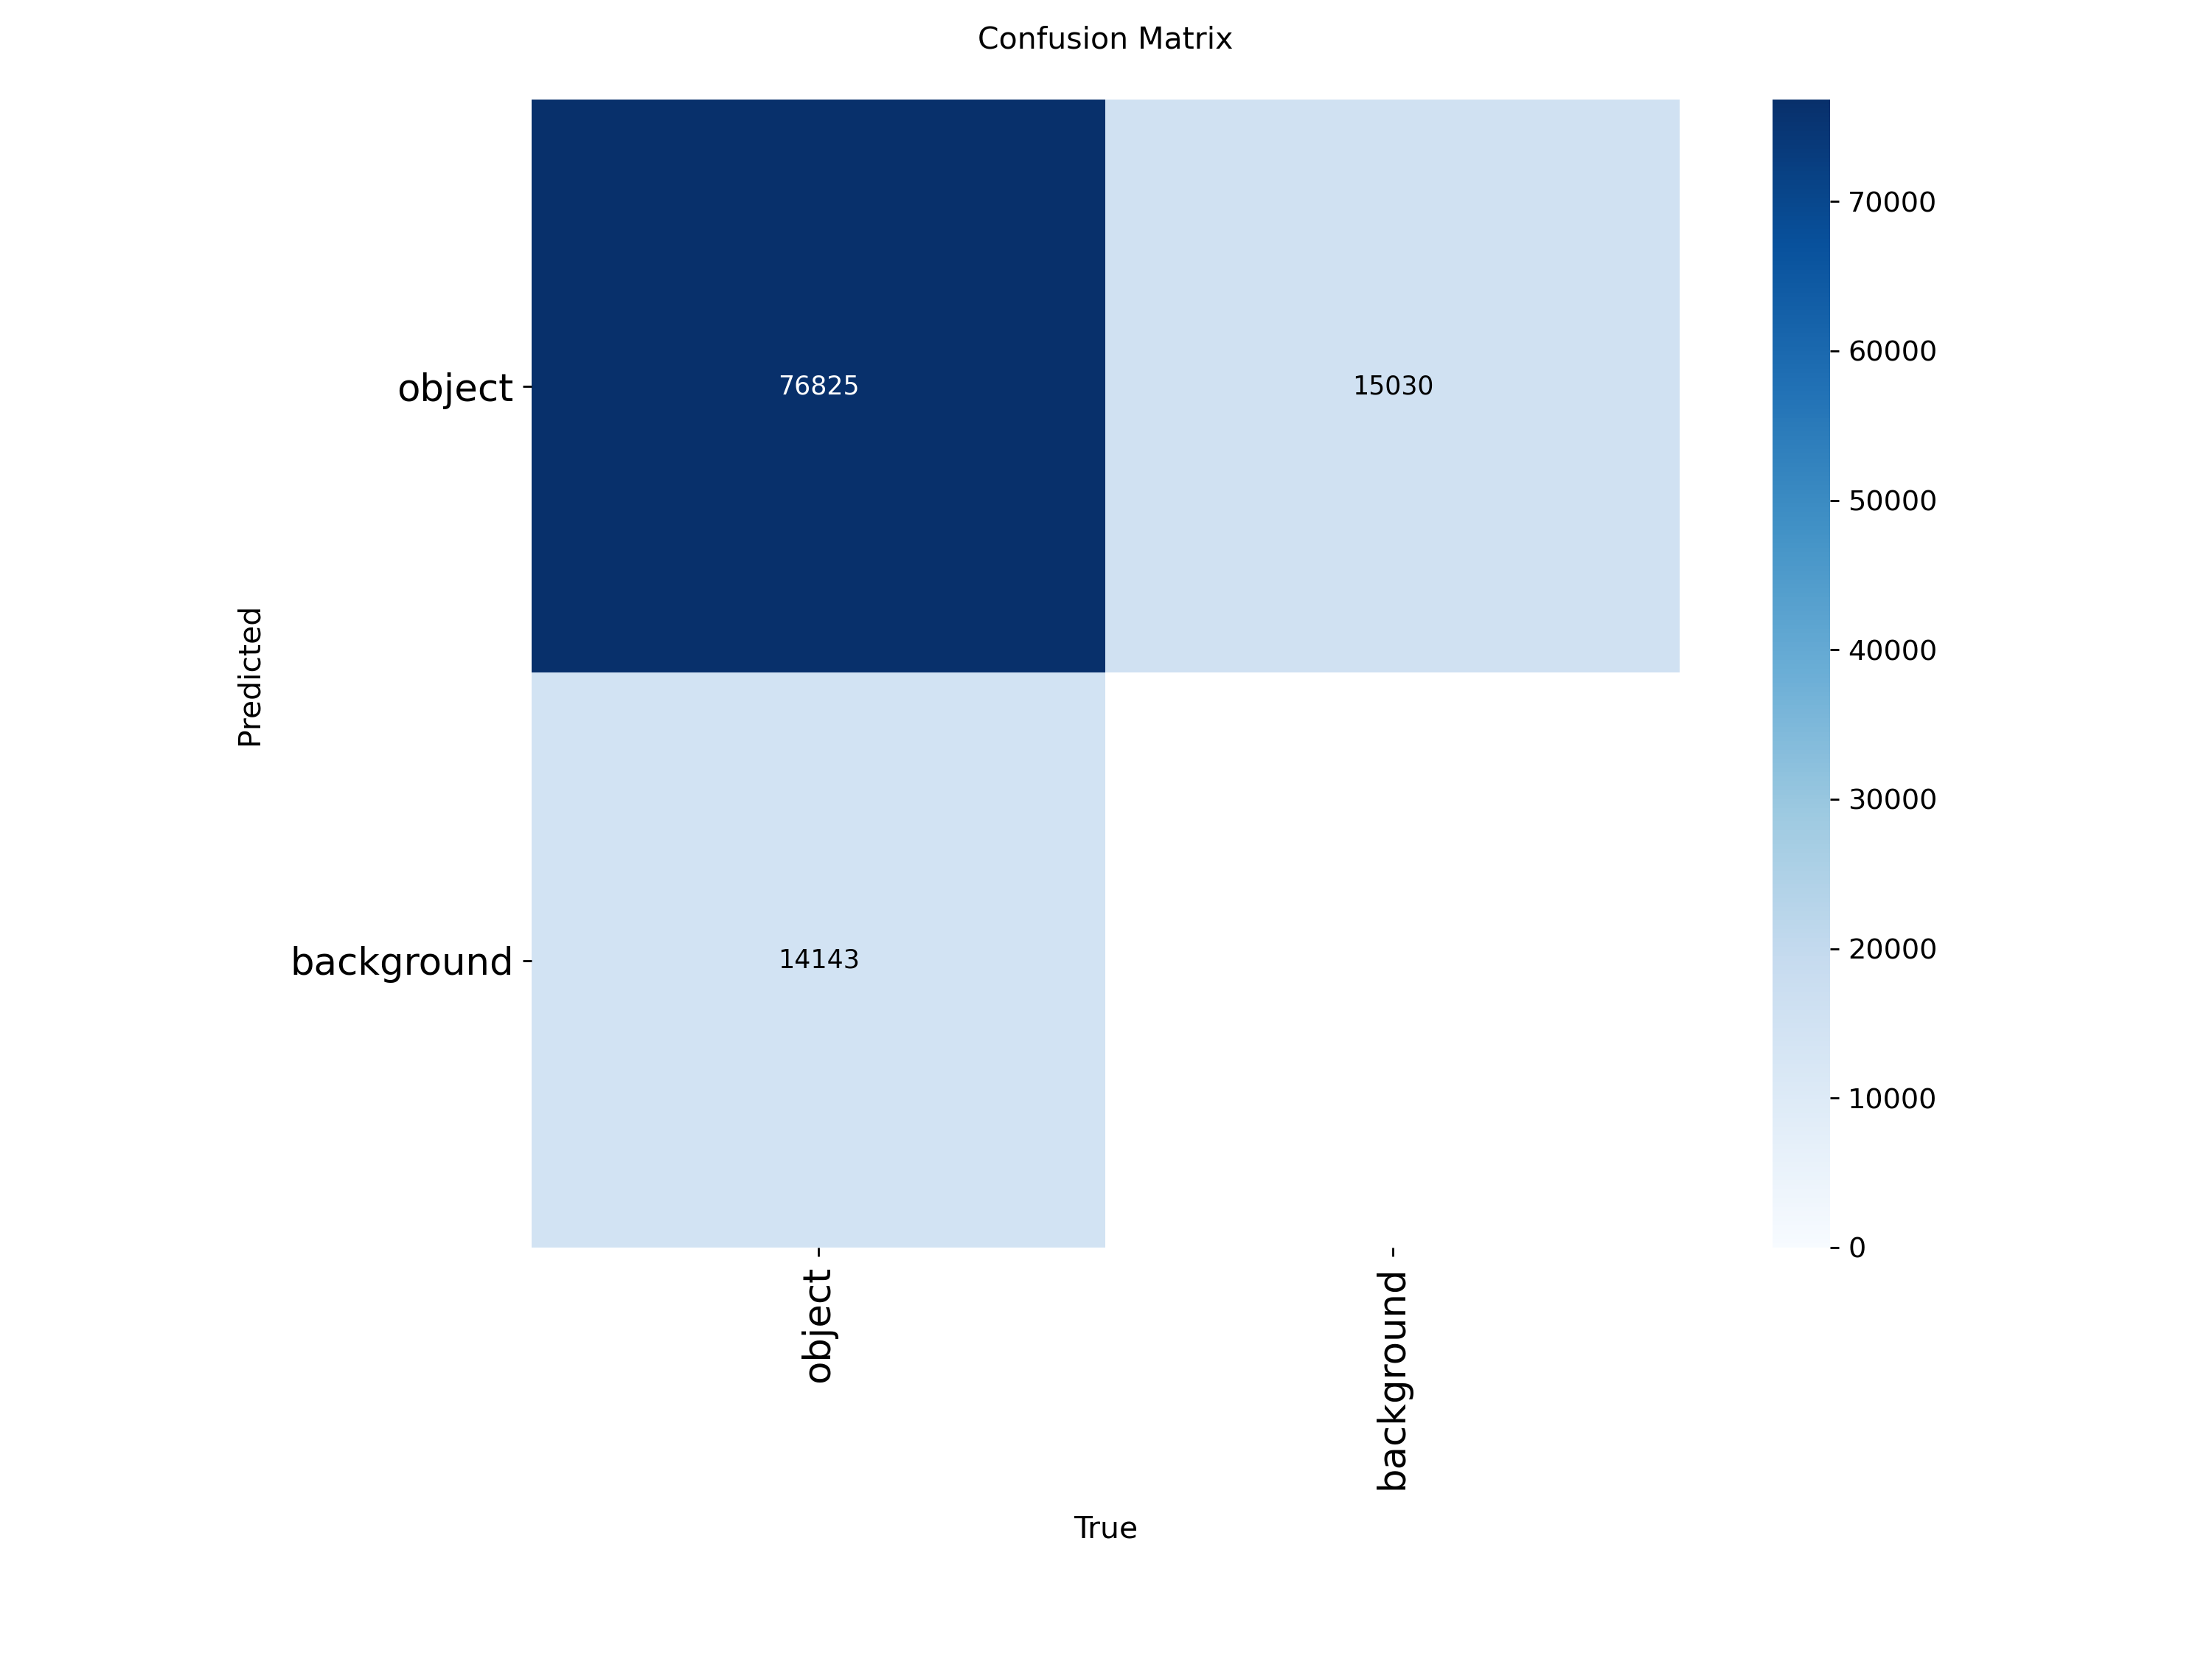

In [43]:
from IPython.display import Image, display

# Set your result directory path
results_dir = "../outputs/sku110k_continue"

# Display training curves
display(Image(filename=f"{results_dir}/results.png", width=700))  # mAP, Precision, Recall over epochs

# Display PR curve
display(Image(filename=f"{results_dir}/PR_curve.png", width=700))  # Precision-Recall curve

# (Optional) Display confusion matrix
conf_matrix_path = f"{results_dir}/confusion_matrix.png"
if os.path.exists(conf_matrix_path):
    display(Image(filename=conf_matrix_path, width=700))


## Summary
This project demonstrates how I built an item detection and counting system using a custom-trained YOLOv8n model on the SKU110K retail shelf dataset.

The model was trained to detect densely packed products on store shelves and count them accurately — a task that is both visually challenging and highly valuable for retail automation.

To make the system practical and interactive:

I integrated it with a FastAPI backend for image uploads, real-time inference, and automatic CSV logging.

I created this notebook as a visual demo, showcasing how the model performs on various test images.

While this project currently focuses on static image detection, it lays the groundwork for more advanced applications like object tracking, inventory dashboards, and real-time alert systems.

### What's Next?
Now that detection and counting work reliably on SKU110K images, future directions could include:

- Multi-class classification: Detect and differentiate item types (e.g., bottles, boxes, cans) if labeled classes are available.

- Video inference with tracking: Extend detection to real-time video using YOLO + DeepSORT.

- Dashboard integration: Visualize metrics like item counts, detection times, and upload history via a simple web dashboard.

- Deployment: Package the FastAPI + YOLO model into a Docker container for portable, scalable inference.

- Model upgrades: Experiment with yolov8s or yolov8m for potentially better accuracy at the cost of slightly higher computation.

